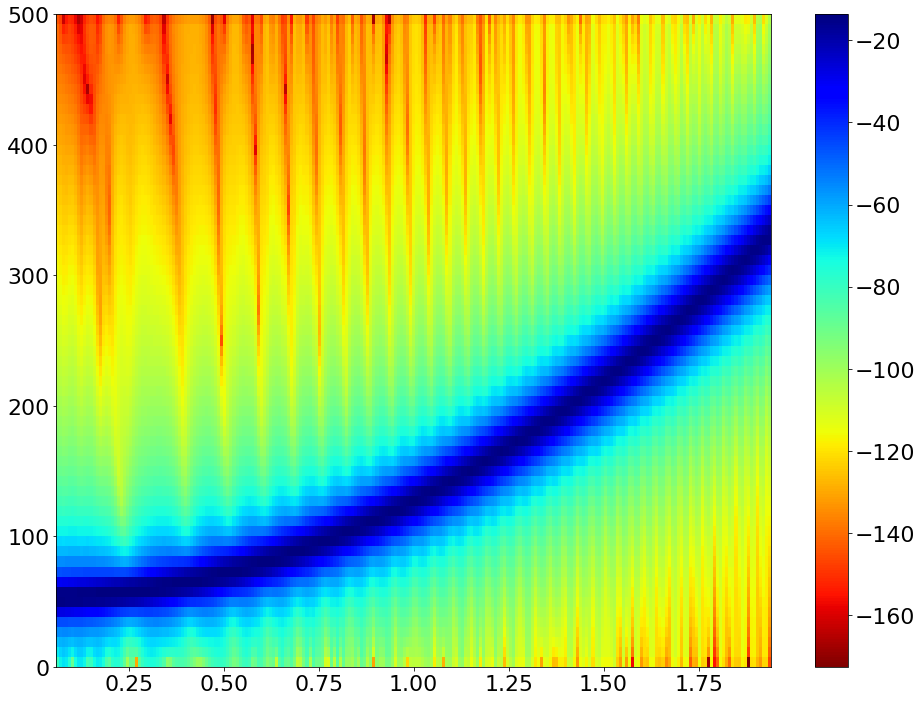

In [12]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 22})

dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 350
t1 = 2

# Creating a signal that rises from 50Hz freq to 350Hz
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))

fs = 1/dt
# Playing the signal as audio
sd.play(2*x, fs)
plt.specgram(x, NFFT=128, Fs=fs, noverlap=120, cmap='jet_r')
plt.colorbar()
plt.show()

/home/sidrag/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


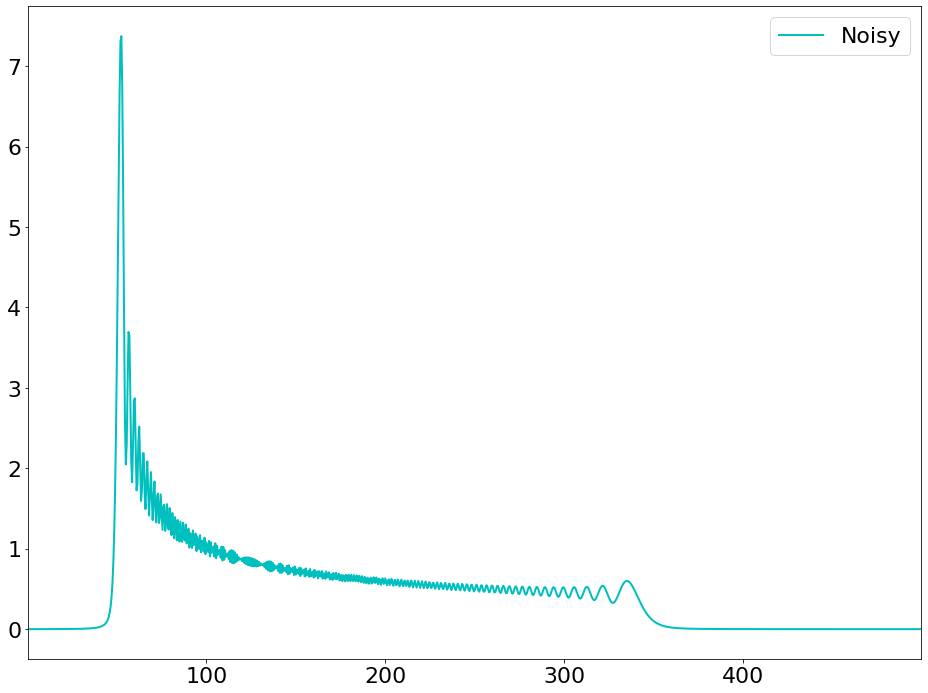

In [16]:
n = len(t)

# fft of the signal f
f_hat = np.fft.fft(x,n)
# Power Spectral Density(PSD)
PSD = f_hat * np.conj(f_hat) / n
# frequency vector corresponding to the time vector 't'
freq = (1/(dt*n)) * np.arange(n)
# plotting the first half only
L = np.arange(1,np.floor(n/2),dtype='int')

plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()